# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split

**Summary**: In Prof. Hug's video, he mentioned two primary goals:
# **What factors make a car more or less expensive?**
# **What consumers value in a used car?**
The price of a used car could be affected by several features, including the age, miles driven, car models.  I consider this study is (1) to reveal a multivariate regression model of the car price, and (2) to look for clustering of customer purchasers to seek patterns of buyers and their profiles.

The business objective is to provide insight as to what car models to sell, where, and to whom.  This would allow car dealers to be more efficient.

I looked at some preliminary information to prepare my mind.
For the first three thousand miles or so, cars usually drop about $5,000-$10,000, so it averages out to around $1.50 to $3 per mile. After that, the price drop is lower, and can go from around $.25  to $.5 per mile.

Car price is a function of time, categories, and models.
https://caredge.com/guides/used-car-price-trends-for-2024

Ten used car models with biggest price drops from 9 to 10 2022.  Tesla model 3, Nissan Kicks, Ford Mustang, Hyundai Ioniq, Toyota Rav34, Jaguar E pace, GMC Arcadia, Ford Ecoscport, Toyota Camera, Audi SQ5

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [ ]:
car = pd.read_csv('vehicles.csv')
car.sample(15)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
227603,7315365819,kalispell,35998,2016.0,ford,f-150 quad cab short box,NaN,NaN,gas,52796.0,clean,automatic,1FTFX1EFXGFA53370,4wd,NaN,NaN,NaN,mt
115740,7314349605,tallahassee,15500,2012.0,bmw,x3,NaN,NaN,gas,78115.0,clean,automatic,5UXWX7C50CL736752,NaN,NaN,SUV,NaN,fl
259217,7316762305,albuquerque,19990,2016.0,ford,transit connect passenger,good,NaN,gas,39044.0,clean,automatic,NM0GS9F72G1256644,fwd,NaN,van,blue,nm
355781,7308300670,knoxville,17999,2018.0,volkswagen,jetta gli,excellent,4 cylinders,gas,36107.0,clean,automatic,NaN,fwd,mid-size,sedan,grey,tn
50186,7312484089,reno / tahoe,19500,2006.0,mercedes-benz,benz r500,excellent,NaN,gas,94000.0,clean,automatic,NaN,4wd,full-size,NaN,grey,ca
256011,7310324999,north jersey,1,2020.0,honda,accord,like new,NaN,gas,100.0,rebuilt,automatic,NaN,NaN,NaN,NaN,NaN,nj
341029,7314471852,york,6950,2011.0,toyota,prius,excellent,NaN,hybrid,151183.0,clean,automatic,JTDKN3DU6B0261970,fwd,NaN,hatchback,NaN,pa
151093,7305186721,fort wayne,23590,2017.0,jaguar,xe 25t premium sedan 4d,good,NaN,other,48957.0,clean,other,SAJAD4BG8HA950446,rwd,NaN,sedan,white,in
57530,7314816724,san luis obispo,16998,2017.0,mazda,mazda3 4-door,excellent,NaN,gas,60389.0,clean,automatic,3MZBN1U70HM107949,fwd,NaN,sedan,NaN,ca
189392,7308833427,south coast,9000,1981.0,chevrolet,corvette coupe,good,8 cylinders,gas,60000.0,clean,automatic,NaN,rwd,NaN,coupe,yellow,ma


In [ ]:
car.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [ ]:
car.info()
# it appears "size", "conditions", "cylinders","size" and "paint color" are largely incomplete

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [ ]:
car.isnull().sum()
#car.shape

,0
id,0
region,0
price,0
year,1205
manufacturer,17646
model,5277
condition,174104
cylinders,177678
fuel,3013
odometer,4400


In [ ]:
car.manufacturer.unique()

array([nan, 'gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram',
       'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar', 'buick',
       'chrysler', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfa-romeo',
       'subaru', 'acura', 'hyundai', 'mercedes-benz', 'bmw', 'mitsubishi',
       'volkswagen', 'porsche', 'kia', 'rover', 'ferrari', 'mini',
       'pontiac', 'fiat', 'tesla', 'saturn', 'mercury', 'harley-davidson',
       'datsun', 'aston-martin', 'land rover', 'morgan'], dtype=object)

In [ ]:
car.drive.unique()

array([nan, 'rwd', '4wd', 'fwd'], dtype=object)

In [ ]:
car.type.unique()

array([nan, 'pickup', 'truck', 'other', 'coupe', 'SUV', 'hatchback',
       'mini-van', 'sedan', 'offroad', 'bus', 'van', 'convertible',
       'wagon'], dtype=object)

In [ ]:
len(car.model.unique())
# There are too many model information

29650

In [ ]:
# prompt: list different unique values of column size for car dataframe
# Assuming your DataFrame is named 'car'
unique_sizes = car['size'].unique()
unique_sizes

array([nan, 'full-size', 'mid-size', 'compact', 'sub-compact'],
      dtype=object)

In [ ]:
car.cylinders.unique()

array([nan, '8 cylinders', '6 cylinders', '4 cylinders', '5 cylinders',
       'other', '3 cylinders', '10 cylinders', '12 cylinders'],
      dtype=object)

In [ ]:
car.model.value_counts()

,count
model,
f-150,8009
silverado 1500,5140
1500,4211
camry,3135
silverado,3023
...,...
plymouth fury 1,1
f550 box truck delivery,1
duramax 2500hd,1


In [ ]:
car.manufacturer.value_counts()

,count
manufacturer,
ford,70985
chevrolet,55064
toyota,34202
honda,21269
nissan,19067
jeep,19014
ram,18342
gmc,16785
bmw,14699


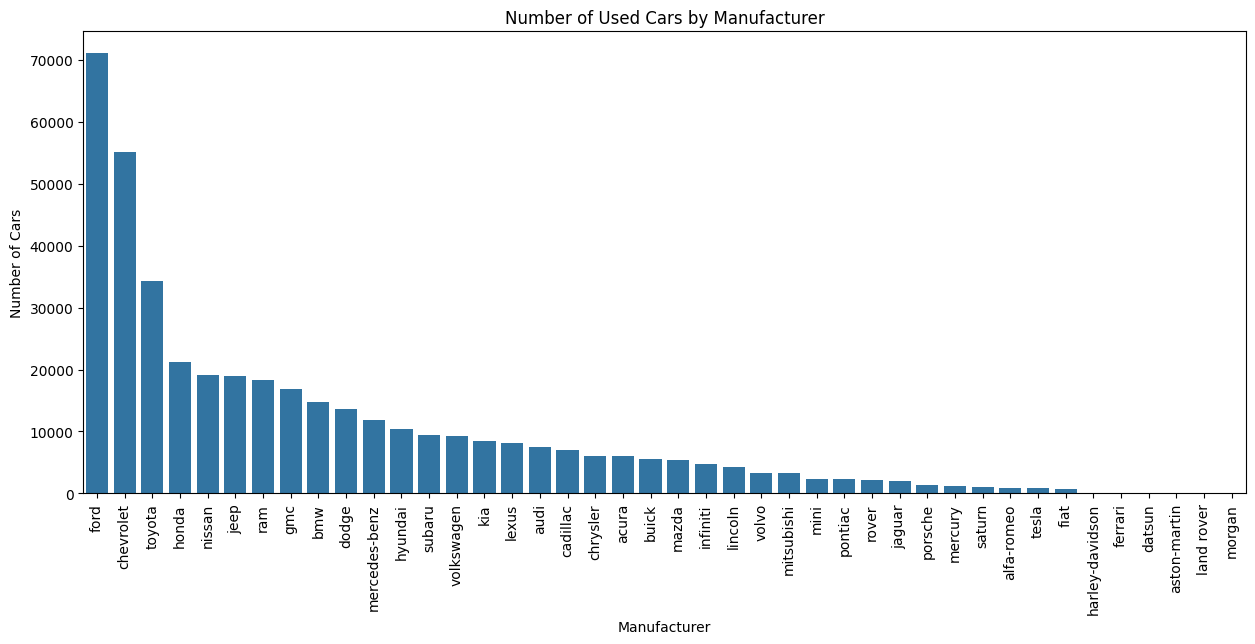

In [ ]:
# prompt: plot the number of used cars under each manufacturer

manufacturer_counts = car['manufacturer'].value_counts()

plt.figure(figsize=(15, 6))
sns.barplot(x=manufacturer_counts.index, y=manufacturer_counts.values)
plt.title('Number of Used Cars by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Number of Cars')
plt.xticks(rotation=90)
plt.show()

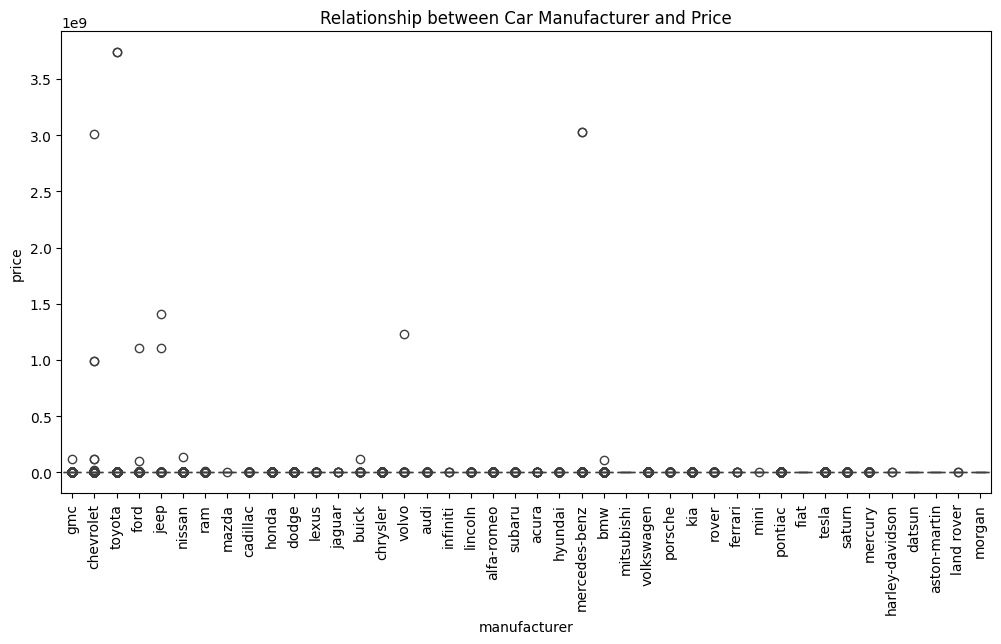

In [ ]:
# prompt: plot relation of car manufacturer and price
# is there a way to clean up general outliers?
plt.figure(figsize=(12, 6))
sns.boxplot(x='manufacturer', y='price', data=car)
plt.xticks(rotation=90)
plt.title('Relationship between Car Manufacturer and Price')
plt.show()

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'odometer'}>]], dtype=object)

<Figure size 3000x600 with 0 Axes>

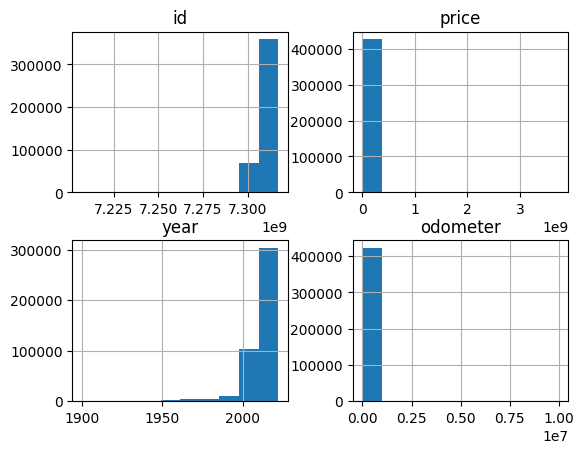

In [ ]:
plt.figure(figsize=(30, 6))
car.hist()

<Axes: xlabel='odometer', ylabel='price'>

<Figure size 1900x600 with 0 Axes>

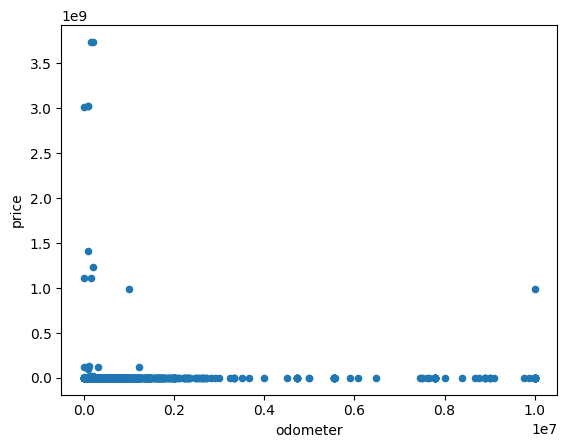

In [ ]:
plt.figure(figsize=(19, 6))
car.plot.scatter(x='odometer', y='price')

In [ ]:
# prompt: find the column where price is greater than 300000

rows_with_high_price = car[car['price'] > 300000]

# Print the rows where the price is greater than 300000
rows_with_high_price

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
280,7315849335,birmingham,987654321,1960.0,chevrolet,NaN,NaN,NaN,gas,999999.0,clean,manual,NaN,NaN,NaN,NaN,NaN,al
1838,7315961634,dothan,99999999,1993.0,ford,ranger,NaN,NaN,gas,99999.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,al
26075,7314964461,fresno / madera,1111111,2014.0,chevrolet,NaN,NaN,NaN,other,11.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,ca
29386,7305265540,humboldt county,1111111111,1999.0,ford,f350 super duty lariat,good,8 cylinders,diesel,149000.0,clean,automatic,NaN,rwd,full-size,pickup,white,ca
37409,7314053169,modesto,1111111111,2020.0,jeep,NaN,NaN,NaN,gas,1000.0,clean,automatic,NaN,4wd,NaN,NaN,NaN,ca
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379133,7305725228,mcallen / edinburg,25003000,1991.0,chevrolet,camaro,fair,6 cylinders,gas,200000.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,tx
384872,7304058513,waco,1234567,1955.0,chevrolet,NaN,good,NaN,other,99999.0,missing,other,NaN,NaN,NaN,NaN,NaN,tx
384898,7303381671,waco,1234567,1955.0,chevrolet,NaN,good,NaN,other,99999.0,missing,other,NaN,NaN,NaN,NaN,NaN,tx
399462,7313998757,winchester,304995,2021.0,porsche,911,NaN,NaN,gas,22.0,clean,automatic,WP0CD2A97MS263705,NaN,NaN,convertible,white,va


# Many features have outliers.  There are 77 rows of cars more expensive than 300000.  There are cars with odometer great than 600000 miles.  Some used cars are too old (80-120 years).

In [ ]:
# prompt: remove rows where car price is greater than 300000

car = car[car['price'] <= 80000]

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'odometer'}>]], dtype=object)

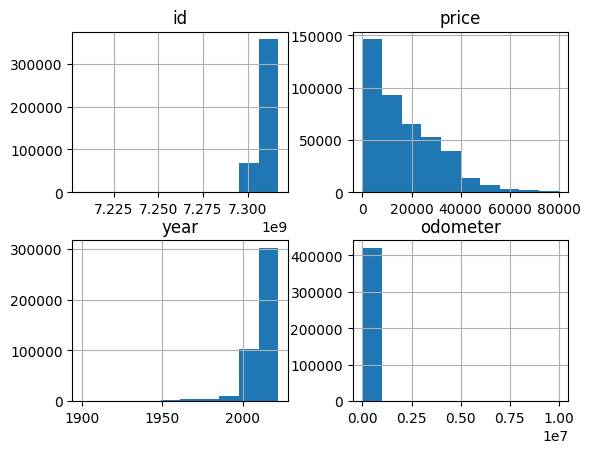

In [ ]:
car.hist()

In [ ]:
#car.plot.scatter(x='odometer', y='price')


In [ ]:
car = car[car['odometer'] <= 600000]

In [ ]:
# prompt: add an age column where values are 2025 minus year column

import pandas as pd

# Assuming your DataFrame is named 'car'
# Assuming your 'year' column exists

car['age'] = 2025 - car['year']

In [ ]:
# prompt: summary of range of values for age column

import pandas as pd

# Assuming your DataFrame is named 'car' and you have already created the 'age' column
print(car['age'].describe())

count    418552.000000
mean         13.732805
std           9.329007
min           3.000000
25%           8.000000
50%          12.000000
75%          17.000000
max         125.000000
Name: age, dtype: float64


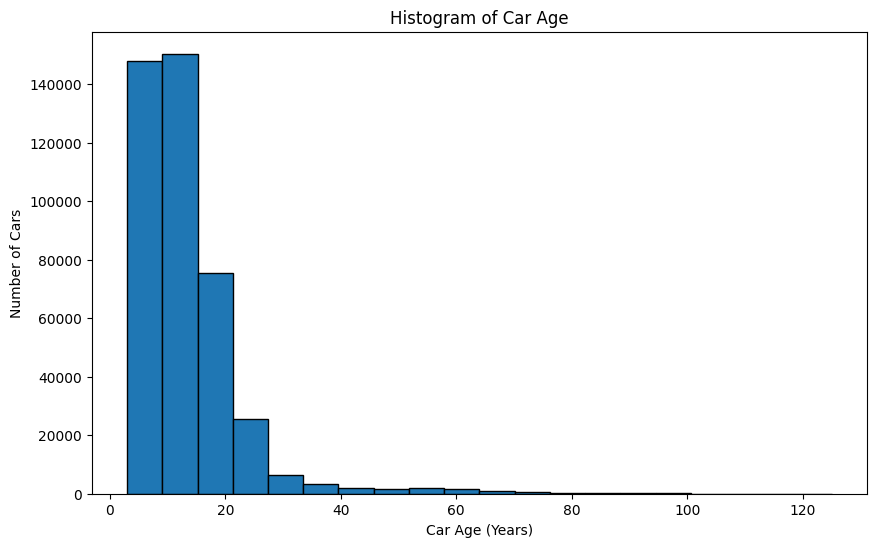

In [ ]:
# prompt: plot the histogram of car age

# Assuming your DataFrame is named 'car' and you have already created the 'age' column
plt.figure(figsize=(10, 6))
plt.hist(car['age'], bins=20, edgecolor='black')
plt.xlabel('Car Age (Years)')
plt.ylabel('Number of Cars')
plt.title('Histogram of Car Age')
plt.show()

In [ ]:
# prompt: remove the year column from car data frame

# Drop the 'year' column
car = car.drop('year', axis=1)

In [ ]:
# prompt: remove rows where age is great than 30

# Assuming your DataFrame is named 'car' and you have an 'age' column

car = car[car['age'] <= 30]

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'odometer'}>,
        <Axes: title={'center': 'age'}>]], dtype=object)

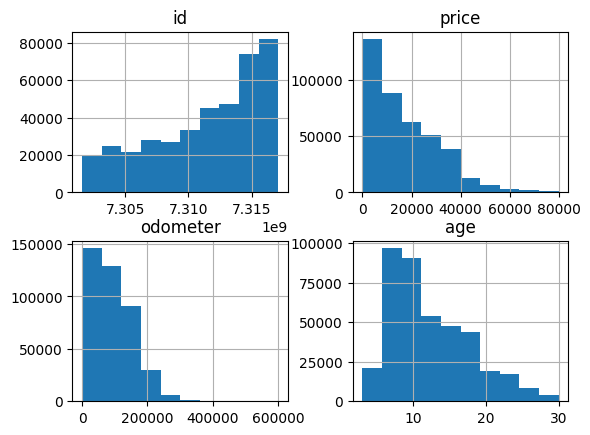

In [ ]:
car.hist()

In [ ]:
# prompt: remove rows with odometer larger than 600000

car = car[car['odometer'] <= 400000]

In [ ]:
#car.plot.scatter(x='odometer', y='price')

In [ ]:
car.shape
# if we drop outlier entries of price and miles, we have eliminated about 7000 entries.

(402825, 18)

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'odometer'}>,
        <Axes: title={'center': 'age'}>]], dtype=object)

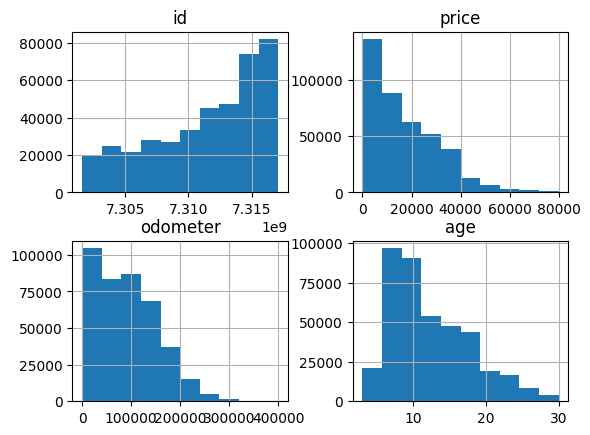

In [ ]:
car.hist()

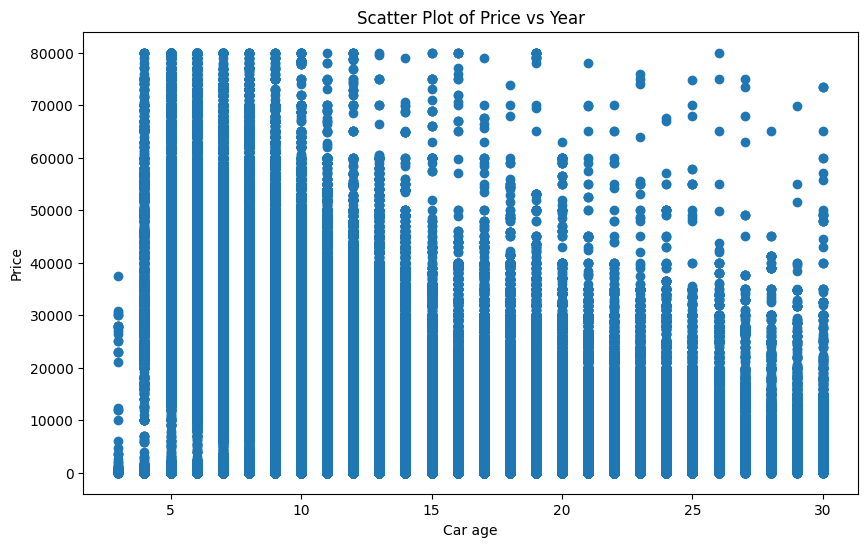

In [ ]:
# prompt: scatter plot of price and year

# Assuming your DataFrame is named 'car'
plt.figure(figsize=(10, 6))
plt.scatter(car['age'], car['price'])
plt.xlabel('Car age')
plt.ylabel('Price')
plt.title('Scatter Plot of Price vs Year')
plt.show()

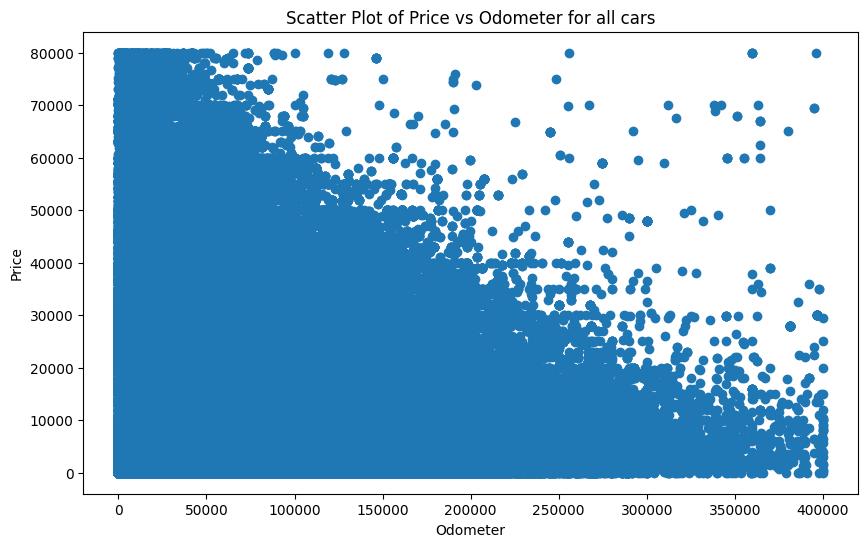

In [ ]:
# prompt: scatter plot of price and odometer

# Assuming your DataFrame is named 'car'
plt.figure(figsize=(10, 6))
plt.scatter(car['odometer'], car['price'])
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.title('Scatter Plot of Price vs Odometer for all cars')
plt.show()

In [ ]:
#car.shape
# count of reduction after removing outliers of age, odometers, and price

In [ ]:
# prompt: create a new df from car where all NaN values are dropped
# this is an easier clean drop and the resulting df can be used to get a better
# feel of data
car1 = car.dropna()

In [ ]:
# prompt: describe car1 data frame with numbers rounders to 1, skip the id column

description = car1.drop('id', axis=1).describe().round(1)

description

,price,odometer,age
count,34063.0,34063.0,34063.0
mean,15717.4,106314.5,13.1
std,12964.9,56000.9,5.0
min,0.0,0.0,3.0
25%,6500.0,66035.0,9.0
50%,12000.0,104731.0,12.0
75%,22000.0,141386.5,17.0
max,80000.0,400000.0,30.0


In [ ]:
car1.info()
# if we drop any entry with empty cells, we have 34000 left.  Let's work with this one first.

<class 'pandas.core.frame.DataFrame'>
Index: 34063 entries, 126 to 426836
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            34063 non-null  int64  
 1   region        34063 non-null  object 
 2   price         34063 non-null  int64  
 3   manufacturer  34063 non-null  object 
 4   model         34063 non-null  object 
 5   condition     34063 non-null  object 
 6   cylinders     34063 non-null  object 
 7   fuel          34063 non-null  object 
 8   odometer      34063 non-null  float64
 9   title_status  34063 non-null  object 
 10  transmission  34063 non-null  object 
 11  VIN           34063 non-null  object 
 12  drive         34063 non-null  object 
 13  size          34063 non-null  object 
 14  type          34063 non-null  object 
 15  paint_color   34063 non-null  object 
 16  state         34063 non-null  object 
 17  age           34063 non-null  float64
dtypes: float64(2), int64(2), obj

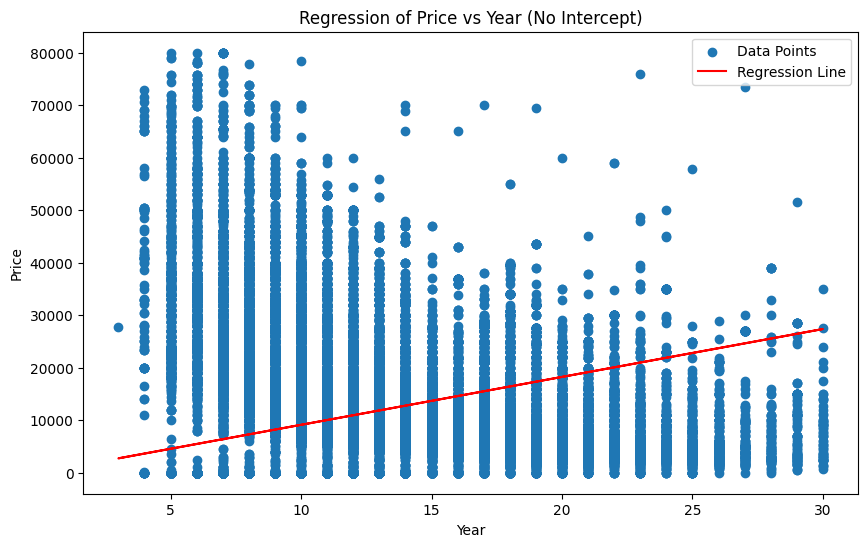

Mean Squared Error (MSE): 250456235.02951345


In [ ]:
# prompt: find single variable regression with intercept at zero, between age and price and plot the relation

# Assuming your DataFrame is named 'car1'
X = car1['age'].values.reshape(-1, 1)
y = car1['price'].values

# Create a linear regression model with no intercept
model = LinearRegression(fit_intercept=False)

# Fit the model to the data
model.fit(X, y)

# Get the slope (coefficient) of the regression line
slope = model.coef_[0]

# Predict the prices using the fitted model
y_pred = model.predict(X)

# Plot the data and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Data Points')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Regression of Price vs Year (No Intercept)')
plt.legend()
plt.show()

# Calculate and print the mean squared error (MSE)
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

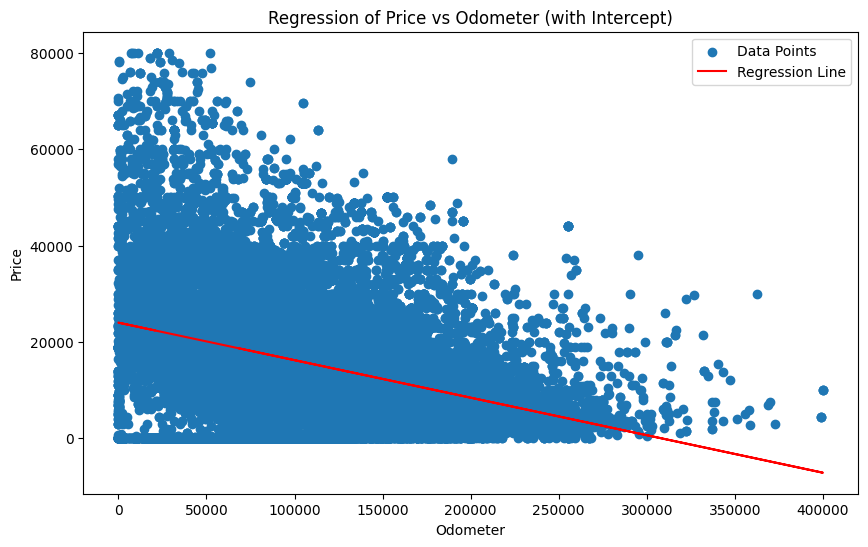

Mean Squared Error (MSE): 149078257.55697262
Intercept: 23993.977309498023
Slope: -0.07785030915208635


In [ ]:
# prompt: find linear regression between odometer and price with intercept not zero

# Assuming your DataFrame is named 'car1'
X = car1['odometer'].values.reshape(-1, 1)
y = car1['price'].values

# Create a linear regression model with an intercept
model = LinearRegression(fit_intercept=True)

# Fit the model to the data
model.fit(X, y)

# Get the slope (coefficient) and intercept of the regression line
slope = model.coef_[0]
intercept = model.intercept_

# Predict the prices using the fitted model
y_pred = model.predict(X)

# Plot the data and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Data Points')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.title('Regression of Price vs Odometer (with Intercept)')
plt.legend()
plt.show()

# Calculate and print the mean squared error (MSE)
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Intercept: {intercept}")
print(f"Slope: {slope}")

In [ ]:
car1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34063 entries, 126 to 426836
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            34063 non-null  int64  
 1   region        34063 non-null  object 
 2   price         34063 non-null  int64  
 3   manufacturer  34063 non-null  object 
 4   model         34063 non-null  object 
 5   condition     34063 non-null  object 
 6   cylinders     34063 non-null  object 
 7   fuel          34063 non-null  object 
 8   odometer      34063 non-null  float64
 9   title_status  34063 non-null  object 
 10  transmission  34063 non-null  object 
 11  VIN           34063 non-null  object 
 12  drive         34063 non-null  object 
 13  size          34063 non-null  object 
 14  type          34063 non-null  object 
 15  paint_color   34063 non-null  object 
 16  state         34063 non-null  object 
 17  age           34063 non-null  float64
dtypes: float64(2), int64(2), obj

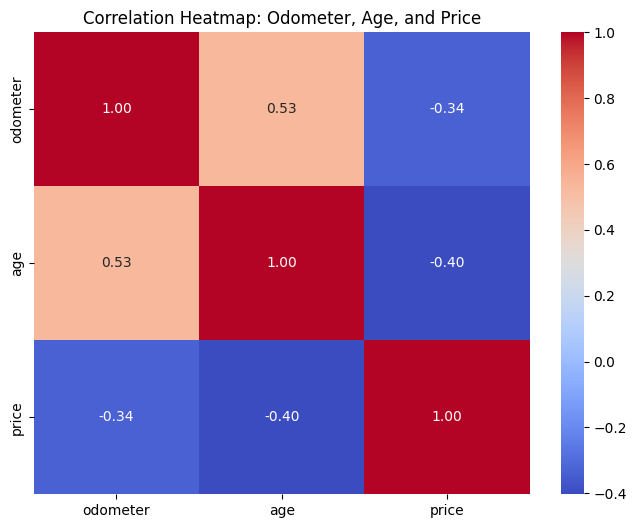

In [ ]:
# prompt: generate correlation heatmap between odometer, age, and price

correlation_data = car1[['odometer', 'age', 'price']]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Odometer, Age, and Price')
plt.show()

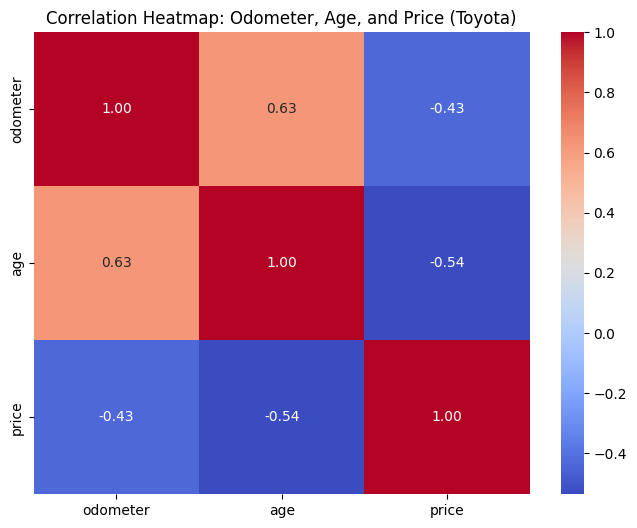

In [ ]:
# prompt: generate correlation heatmap of age, odometer and price for ford

# Filter for Ford cars
ford_cars = car1[car1['manufacturer'] == 'toyota']

# Select the columns for correlation analysis
correlation_data = ford_cars[['odometer', 'age', 'price']]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Odometer, Age, and Price (Toyota)')
plt.show()

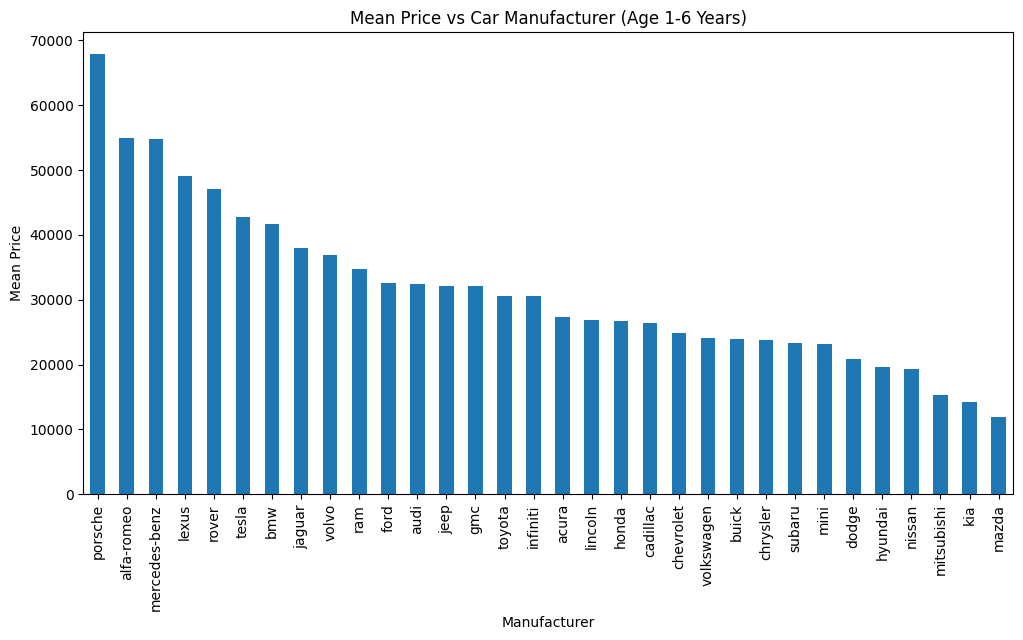

In [ ]:
# prompt: plot mean price vs car manufacturer, for age between 1 to 6 years, ranked from highest to lowest

# Assuming your DataFrame is named 'car1'
car_filtered = car1[(car1['age'] >= 1) & (car1['age'] <= 6)]

# Group by manufacturer and calculate the mean price
mean_price_by_manufacturer = car_filtered.groupby('manufacturer')['price'].mean()

# Sort the mean prices in descending order
mean_price_by_manufacturer_sorted = mean_price_by_manufacturer.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
mean_price_by_manufacturer_sorted.plot(kind='bar')
plt.xlabel('Manufacturer')
plt.ylabel('Mean Price')
plt.title('Mean Price vs Car Manufacturer (Age 1-6 Years)')
plt.xticks(rotation=90)
plt.show()

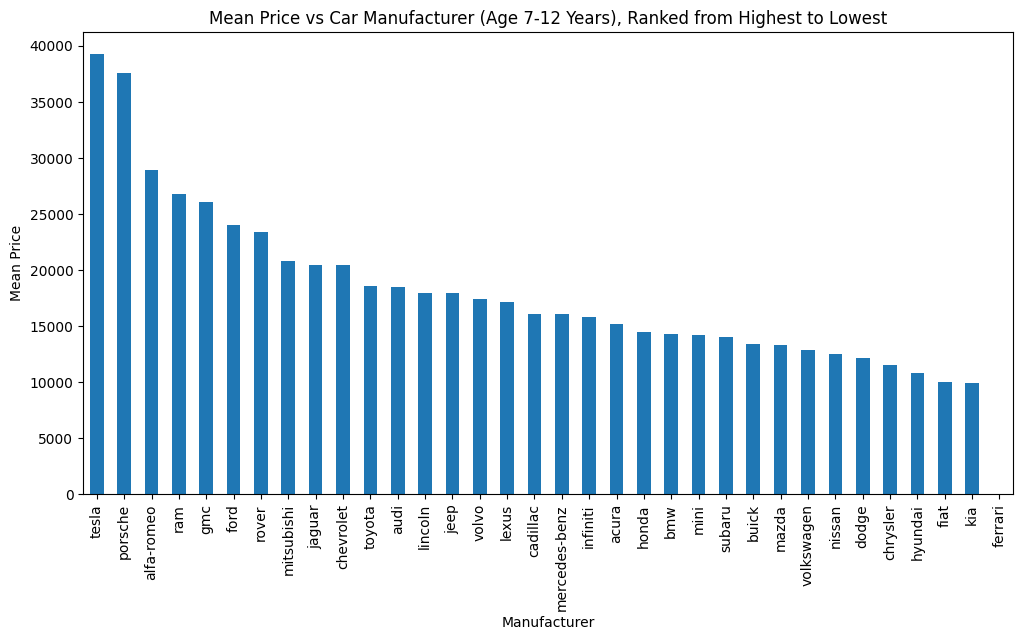

In [ ]:
# prompt: plot mean price vs car manufacturer, for age between 7 to 12 years, ranked from highest to lowest

# Assuming your DataFrame is named 'car1'
car_filtered = car1[(car1['age'] >= 7) & (car1['age'] <= 12)]

# Group by manufacturer and calculate the mean price
mean_price_by_manufacturer = car_filtered.groupby('manufacturer')['price'].mean()

# Sort the mean prices in descending order
mean_price_by_manufacturer_sorted = mean_price_by_manufacturer.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
mean_price_by_manufacturer_sorted.plot(kind='bar')
plt.xlabel('Manufacturer')
plt.ylabel('Mean Price')
plt.title('Mean Price vs Car Manufacturer (Age 7-12 Years), Ranked from Highest to Lowest')
plt.xticks(rotation=90)
plt.show()

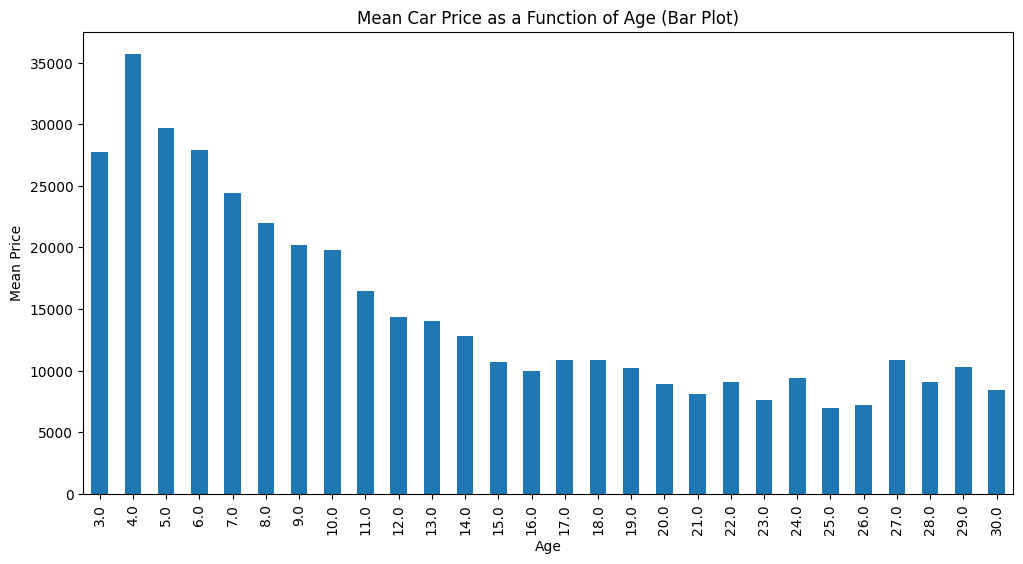

In [ ]:
# prompt: plot car average price as a function of age, plot in bar style

# Assuming your DataFrame is named 'car1'
# Group by age and calculate the mean price
mean_price_by_age = car1.groupby('age')['price'].mean()

# Create a bar plot
plt.figure(figsize=(12, 6))
mean_price_by_age.plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Mean Price')
plt.title('Mean Car Price as a Function of Age (Bar Plot)')
plt.xticks(rotation=90)
plt.show()

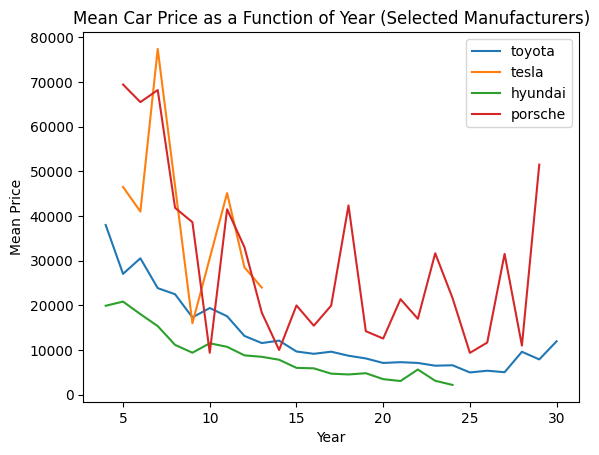

In [ ]:
# prompt: plot mean car price as a function of year for manufacturer columns of toyota, tesla, hyundai, and porsche

# Assuming your DataFrame is named 'car1'
manufacturers = ['toyota', 'tesla', 'hyundai', 'porsche']
for manufacturer in manufacturers:
  manufacturer_data = car1[car1['manufacturer'] == manufacturer]
  mean_price_by_age = manufacturer_data.groupby('age')['price'].mean()
  plt.plot(mean_price_by_age.index, mean_price_by_age.values, label=manufacturer)

plt.xlabel('Year')
plt.ylabel('Mean Price')
plt.title('Mean Car Price as a Function of Year (Selected Manufacturers)')
plt.legend()
plt.show()

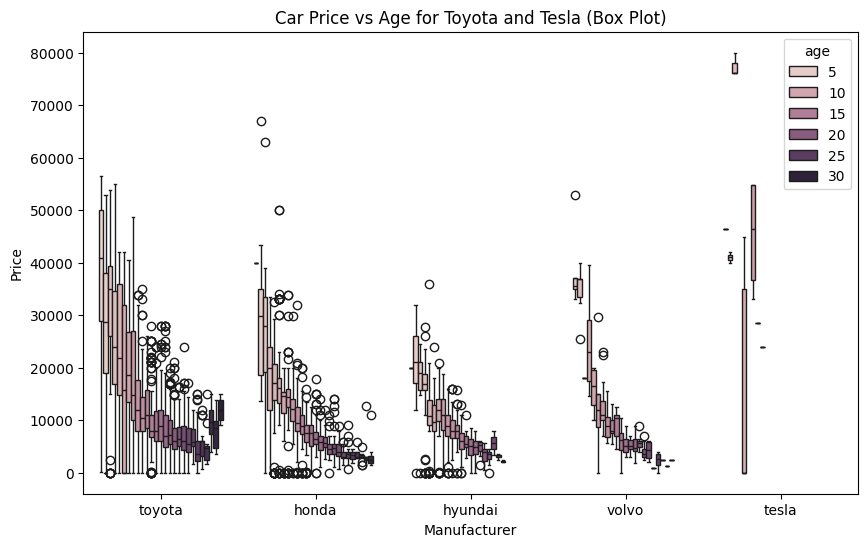

In [ ]:
# prompt: plot car price as a function of age column for the manufacturer "toyota" and "tesla". plot in box plot style

# Assuming your DataFrame is named 'car1'
# Filter the DataFrame for Toyota and Tesla
toyota_tesla_cars = car1[car1['manufacturer'].isin(['toyota', 'tesla','hyundai','honda', 'volvo'])]

# Create a box plot of price vs age for Toyota and Tesla
plt.figure(figsize=(10, 6))
sns.boxplot(x='manufacturer', y='price', data=toyota_tesla_cars, hue='age')
plt.xlabel('Manufacturer')
plt.ylabel('Price')
plt.title('Car Price vs Age for Toyota and Tesla (Box Plot)')
plt.show()

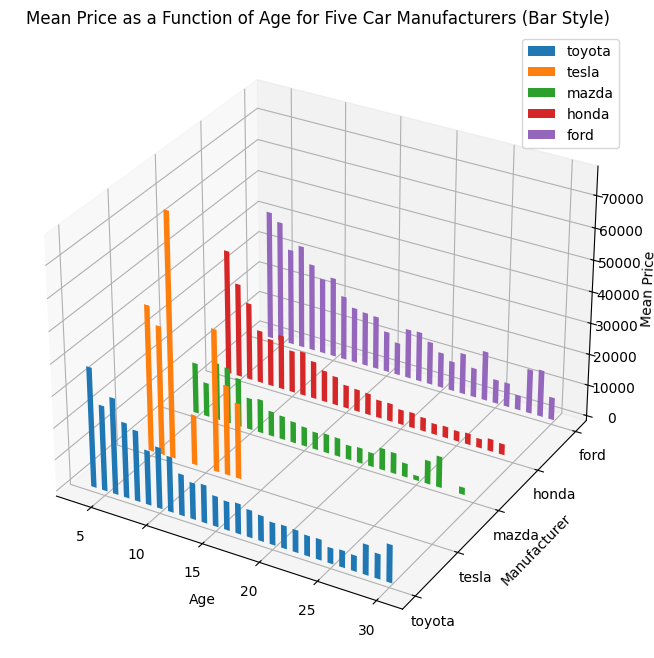

In [ ]:
# prompt: 3D plots of mean price as a function of age for five car manufacturers - toyota, tesla, mazda, honda, and ford.  plot in bar style.

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Assuming your DataFrame is named 'car1'
manufacturers = ['toyota', 'tesla', 'mazda', 'honda', 'ford']
car_filtered = car1[car1['manufacturer'].isin(manufacturers)]

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

for manufacturer in manufacturers:
    manufacturer_data = car_filtered[car_filtered['manufacturer'] == manufacturer]
    mean_prices = manufacturer_data.groupby('age')['price'].mean()
    ages = mean_prices.index
    prices = mean_prices.values

    ax.bar(ages, prices, zs=manufacturers.index(manufacturer), zdir='y', width=0.5, label=manufacturer)


ax.set_xlabel('Age')
ax.set_ylabel('Manufacturer')
ax.set_zlabel('Mean Price')
ax.set_yticks(np.arange(len(manufacturers)))
ax.set_yticklabels(manufacturers)
ax.set_title('Mean Price as a Function of Age for Five Car Manufacturers (Bar Style)')
plt.legend()
plt.show()

In [ ]:
car1['odometer'].corr(car1['price'])

-0.33626753833774037

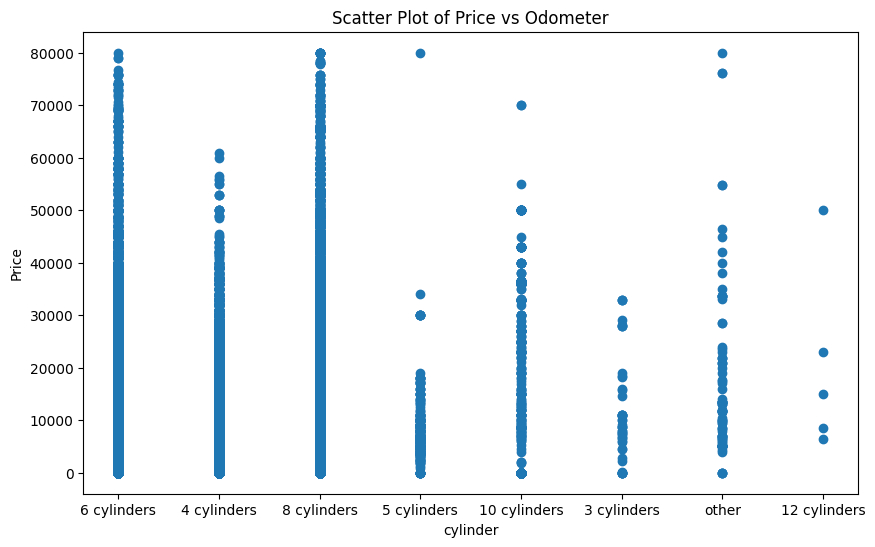

In [ ]:
# prompt: scattered plot between odometer and price

plt.figure(figsize=(10, 6))
plt.scatter(car1['cylinders'], car1['price'])
plt.xlabel('cylinder')
plt.ylabel('Price')
plt.title('Scatter Plot of Price vs Odometer')
plt.show()

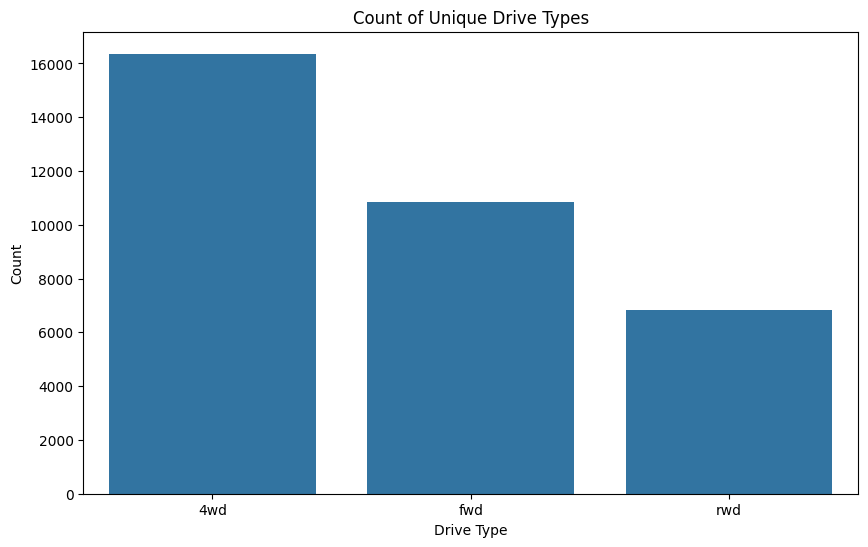

In [ ]:
# prompt: for car1 data frame, plot the count of unique values of the column of "drive"

# Assuming your DataFrame is named 'car1'
drive_counts = car1['drive'].value_counts()

# Create a bar plot of the unique values
plt.figure(figsize=(10, 6))
sns.barplot(x=drive_counts.index, y=drive_counts.values)
plt.xlabel('Drive Type')
plt.ylabel('Count')
plt.title('Count of Unique Drive Types')
plt.show()

In [ ]:
# prompt: add columns of one-hot encoding of size in the dataframe, with dtype of integer

# Assuming your DataFrame is named 'car1'

# Create one-hot encoded columns for 'size'
car1 = pd.get_dummies(car1, columns=['size'], dummy_na=False, dtype=int)

# Print the updated DataFrame to see the new columns
print(car1.head())

             id      region  price manufacturer              model  condition  \
126  7305672709      auburn      0    chevrolet  express cargo van   like new   
127  7305672266      auburn      0    chevrolet  express cargo van   like new   
128  7305672252      auburn      0    chevrolet  express cargo van   like new   
215  7316482063  birmingham   4000       toyota               echo  excellent   
219  7316429417  birmingham   2500          bmw               525i       fair   

       cylinders fuel  odometer title_status  ...                VIN drive  \
126  6 cylinders  gas   68472.0        clean  ...  1GCWGAFP8J1309579   rwd   
127  6 cylinders  gas   69125.0        clean  ...  1GCWGAFP4K1214373   rwd   
128  6 cylinders  gas   66555.0        clean  ...  1GCWGAFPXJ1337903   rwd   
215  4 cylinders  gas  155000.0        clean  ...  JTDBT123520243495   fwd   
219  6 cylinders  gas  110661.0        clean  ...  WBAHD6322SGK86772   rwd   

      type paint_color state   age  size_com

In [ ]:
# prompt: add columns of one-hot encoding of drive in the dataframe, with dtype of integer

# Assuming your DataFrame is named 'car1'

# Create one-hot encoded columns for 'drive'
car1 = pd.get_dummies(car1, columns=['drive'], dummy_na=False, dtype=int)

# Print the updated DataFrame to see the new columns
print(car1.head())

             id      region  price manufacturer              model  condition  \
126  7305672709      auburn      0    chevrolet  express cargo van   like new   
127  7305672266      auburn      0    chevrolet  express cargo van   like new   
128  7305672252      auburn      0    chevrolet  express cargo van   like new   
215  7316482063  birmingham   4000       toyota               echo  excellent   
219  7316429417  birmingham   2500          bmw               525i       fair   

       cylinders fuel  odometer title_status  ... paint_color state   age  \
126  6 cylinders  gas   68472.0        clean  ...       white    al   7.0   
127  6 cylinders  gas   69125.0        clean  ...       white    al   6.0   
128  6 cylinders  gas   66555.0        clean  ...       white    al   7.0   
215  4 cylinders  gas  155000.0        clean  ...        blue    al  23.0   
219  6 cylinders  gas  110661.0        clean  ...       white    al  30.0   

    size_compact size_full-size  size_mid-size  si

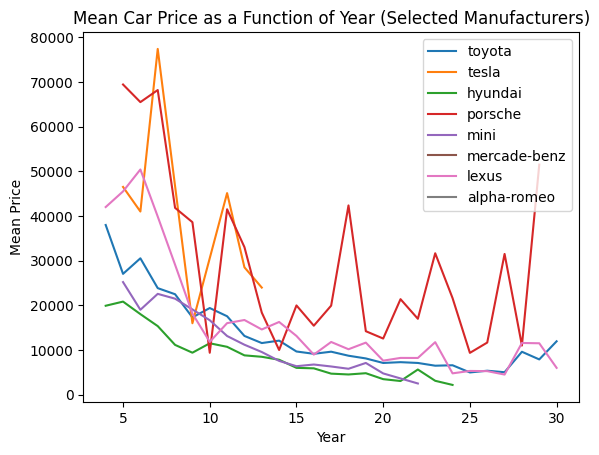

In [ ]:
manufacturers = ['toyota', 'tesla', 'hyundai', 'porsche', 'mini', 'mercade-benz', 'lexus','alpha-romeo']
for manufacturer in manufacturers:
  manufacturer_data = car1[car1['manufacturer'] == manufacturer]
  mean_price_by_age = manufacturer_data.groupby('age')['price'].mean()
  plt.plot(mean_price_by_age.index, mean_price_by_age.values, label=manufacturer)

plt.xlabel('Year')
plt.ylabel('Mean Price')
plt.title('Mean Car Price as a Function of Year (Selected Manufacturers)')
plt.legend()
plt.show()

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

# I noticed the following
1. many empty cells
2. many outliers or wrong entries
3. car model is quite disorganized
4. math relation between miles and price may exist
5. Car models have too many unique values.

Overall weak correlation.  Requires feature engineering

Will create a one-hot encoding for size, drive, and wheels.
There are many other things I could do, for example be more selective in a car brand and prepare a bigger dataset (e.g. Toyota).  However, I believe I got the basic idea.
1. Car price keeps dropping, some faster than others.
2. In some rare cases super old car (vintage) is worth more.
3. There are a lot of Ford on the market and there are many used cars lower than 4 years.

# **Change Cylinders into a number**

In [ ]:
# prompt: make a new column cyl with the number given by cylinders text

# Assuming your DataFrame is named 'car1'

# Create a dictionary to map cylinder text to numbers
cylinder_mapping = {
    '4 cylinders': 4,
    '6 cylinders': 6,
    '8 cylinders': 8,
    '5 cylinders': 5,
    '10 cylinders': 10,
    '3 cylinders': 3,
    '12 cylinders': 12,
    'other': None  # Or assign a default value for 'other'
}

# Create a new column 'cyl' by mapping the 'cylinders' column
car1['cyl'] = car1['cylinders'].map(cylinder_mapping)

# Display the DataFrame with the new column
print(car1[['cylinders', 'cyl']])

          cylinders  cyl
126     6 cylinders  6.0
127     6 cylinders  6.0
128     6 cylinders  6.0
215     4 cylinders  4.0
219     6 cylinders  6.0
...             ...  ...
426788  4 cylinders  4.0
426792  8 cylinders  8.0
426793  4 cylinders  4.0
426833  8 cylinders  8.0
426836  6 cylinders  6.0

[34063 rows x 2 columns]


In [ ]:
car1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34063 entries, 126 to 426836
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                34063 non-null  int64  
 1   region            34063 non-null  object 
 2   price             34063 non-null  int64  
 3   manufacturer      34063 non-null  object 
 4   model             34063 non-null  object 
 5   condition         34063 non-null  object 
 6   cylinders         34063 non-null  object 
 7   fuel              34063 non-null  object 
 8   odometer          34063 non-null  float64
 9   title_status      34063 non-null  object 
 10  transmission      34063 non-null  object 
 11  VIN               34063 non-null  object 
 12  type              34063 non-null  object 
 13  paint_color       34063 non-null  object 
 14  state             34063 non-null  object 
 15  age               34063 non-null  float64
 16  size_compact      34063 non-null  int64  


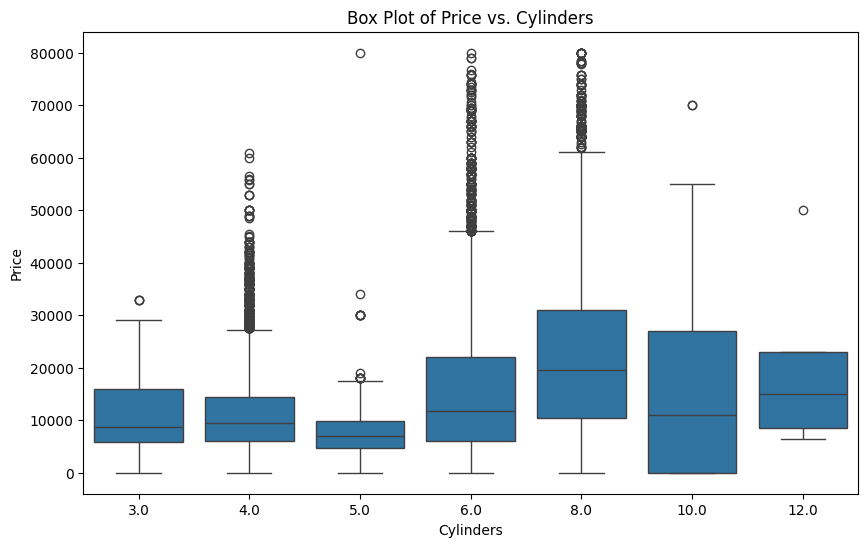

In [ ]:
# prompt: scattered plot between cyl and average price for each unique cyl, plot in box style

# Assuming your DataFrame is named 'car1'
plt.figure(figsize=(10, 6))
sns.boxplot(x='cyl', y='price', data=car1)
plt.xlabel('Cylinders')
plt.ylabel('Price')
plt.title('Box Plot of Price vs. Cylinders')
plt.show()

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [ ]:
# prompt: create a linear regression model between cyl to price

# Assuming your DataFrame is named 'car1' and you have already processed it
# We need to handle missing values in 'cyl' if any
car1['cyl'].fillna(car1['cyl'].median(), inplace=True)  # Replace with median


# Prepare the data
X = car1[['cyl','age']]  # Independent variable (cylinders)
y = car1['price']  # Dependent variable (price)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


# Make predictions on the test set
y_pred = model.predict(X_test)


# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


# Print the coefficients and intercept
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

Mean Squared Error: 118141010.24489662
Coefficients: [ 2764.03847652 -1147.73341155]
Intercept: 14180.050058250503


<ipython-input-391-474ee8b31a62>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car1['cyl'].fillna(car1['cyl'].median(), inplace=True)  # Replace with median


In [ ]:
car1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34063 entries, 126 to 426836
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                34063 non-null  int64  
 1   region            34063 non-null  object 
 2   price             34063 non-null  int64  
 3   manufacturer      34063 non-null  object 
 4   model             34063 non-null  object 
 5   condition         34063 non-null  object 
 6   cylinders         34063 non-null  object 
 7   fuel              34063 non-null  object 
 8   odometer          34063 non-null  float64
 9   title_status      34063 non-null  object 
 10  transmission      34063 non-null  object 
 11  VIN               34063 non-null  object 
 12  type              34063 non-null  object 
 13  paint_color       34063 non-null  object 
 14  state             34063 non-null  object 
 15  age               34063 non-null  float64
 16  size_compact      34063 non-null  int64  


In [ ]:
# prompt: create a linear regression model between cyl, age, and size to price

# Assuming your DataFrame is named 'car1' and you have already processed it
# We need to handle missing values in 'cyl' if any
car1['cyl'].fillna(car1['cyl'].median(), inplace=True)  # Replace with median


# Prepare the data
X = car1[['cyl', 'age', 'size_full-size', 'size_compact','size_mid-size']]  # Independent variables (cylinders, age, size)
y = car1['price']  # Dependent variable (price)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create a linear regression model
model = LinearRegression()


# Train the model
model.fit(X_train, y_train)


# Make predictions on the test set
y_pred = model.predict(X_test)


# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


# Print the coefficients and intercept
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

Mean Squared Error: 112876525.0927443
Coefficients: [ 2066.3136447  -1127.0715956   4138.34428766 -2341.35274335
  -338.13148996]
Intercept: 16072.835153895883


<ipython-input-393-fc6e732bfcd5>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car1['cyl'].fillna(car1['cyl'].median(), inplace=True)  # Replace with median


<ipython-input-394-9eb8a4cbfbec>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car1['cyl'].fillna(car1['cyl'].median(), inplace=True)  # Replace with median


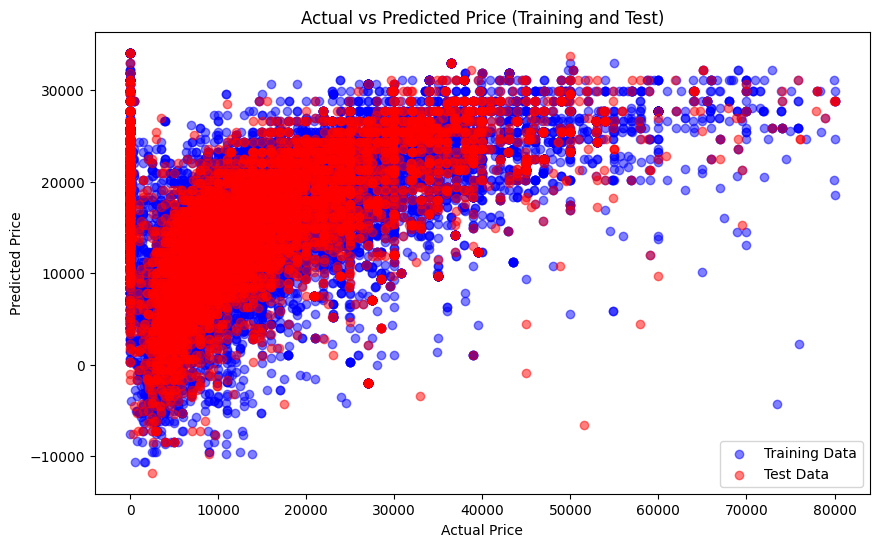

In [ ]:
# prompt: make a plot of the training and test prediction, color the test and training set differently



# Assuming your DataFrame is named 'car1' and you have already processed it
# We need to handle missing values in 'cyl' if any
car1['cyl'].fillna(car1['cyl'].median(), inplace=True)  # Replace with median


# Prepare the data
X = car1[['cyl', 'age', 'size_full-size', 'size_compact','size_mid-size']]  # Independent variables (cylinders, age, size)
y = car1['price']  # Dependent variable (price)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create a linear regression model
model = LinearRegression()


# Train the model
model.fit(X_train, y_train)


# Make predictions on the training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


# Plot the training and test predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='Training Data', alpha=0.5)
plt.scatter(y_test, y_test_pred, color='red', label='Test Data', alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price (Training and Test)')
plt.legend()
plt.show()

# **# A mini subsection specifically on Toyota second hard cars**
Since mixing models of cars does not create a clear picture, I am doing a separate analysis on just Toyota cars since the used car of this brand is popular.
This can be extended to any other models.

In [ ]:
# prompt: make a new dataframe containing only toyota cars, drop all nan values

# Assuming your DataFrame is named 'car1'
toyota_cars = car1[car['manufacturer'] == 'toyota'].dropna()

# Now toyota_cars contains only Toyota cars with no NaN values
print(toyota_cars.head())

              id      region  price manufacturer           model  condition  \
215   7316482063  birmingham   4000       toyota            echo  excellent   
373   7314893113  birmingham   8900       toyota           prius  excellent   
381   7314847158  birmingham  10800       toyota           camry  excellent   
416   7314584193  birmingham   9500       toyota  prius v hybrid       good   
1378  7305846211  birmingham   6350       toyota      corolla le  excellent   

        cylinders    fuel  odometer title_status  ... state   age  \
215   4 cylinders     gas  155000.0        clean  ...    al  23.0   
373   4 cylinders  hybrid  142900.0        clean  ...    al  12.0   
381   4 cylinders  hybrid  147000.0        clean  ...    al  12.0   
416   4 cylinders     gas  136128.0        clean  ...    al  11.0   
1378  4 cylinders     gas  184000.0        clean  ...    al  12.0   

     size_compact size_full-size size_mid-size  size_sub-compact  drive_4wd  \
215             1              

<ipython-input-395-25bc705b7860>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  toyota_cars = car1[car['manufacturer'] == 'toyota'].dropna()


In [ ]:
toyota_cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2855 entries, 215 to 426782
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2855 non-null   int64  
 1   region            2855 non-null   object 
 2   price             2855 non-null   int64  
 3   manufacturer      2855 non-null   object 
 4   model             2855 non-null   object 
 5   condition         2855 non-null   object 
 6   cylinders         2855 non-null   object 
 7   fuel              2855 non-null   object 
 8   odometer          2855 non-null   float64
 9   title_status      2855 non-null   object 
 10  transmission      2855 non-null   object 
 11  VIN               2855 non-null   object 
 12  type              2855 non-null   object 
 13  paint_color       2855 non-null   object 
 14  state             2855 non-null   object 
 15  age               2855 non-null   float64
 16  size_compact      2855 non-null   int64  
 

In [ ]:
# prompt: from the toyota_cars dataframe, remove all entries with odometer larger than 600000,
#remove all entries with odometer less than 100, remove all entries with price
#smaller than 1000, and remove all entries with prices larger than 80000

# Assuming your DataFrame is named 'toyota_cars'
toyota_cars = toyota_cars[(toyota_cars['odometer'] > 100) & (toyota_cars['odometer'] < 600000) &
                         (toyota_cars['price'] > 1000) & (toyota_cars['price'] < 80000)]

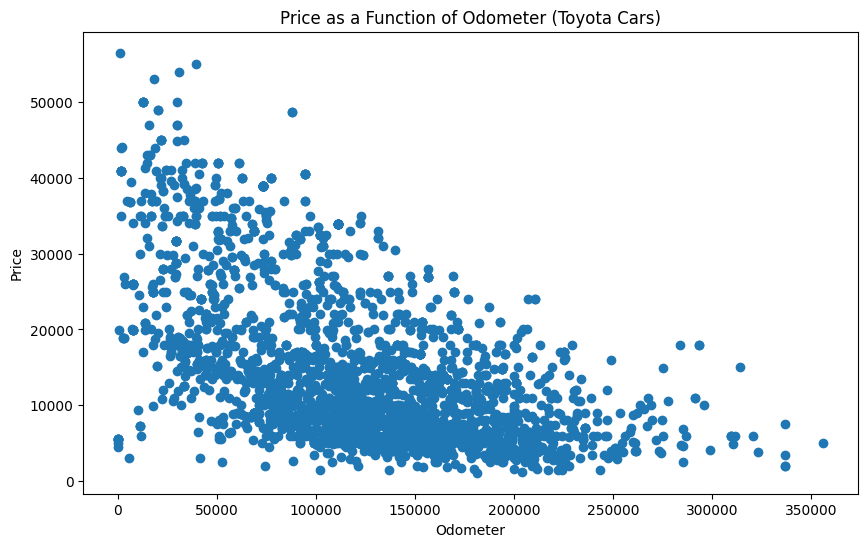

In [ ]:
# prompt: for toyota_cars data frame, plot price as a function of odometer

# Assuming your DataFrame is named 'toyota_cars'
plt.figure(figsize=(10, 6))
plt.scatter(toyota_cars['odometer'], toyota_cars['price'])
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.title('Price as a Function of Odometer (Toyota Cars)')
plt.show()

Mean Squared Error: 48371216.096145906
Coefficients: [-5.46040637e-02 -3.69184280e+03 -7.52243068e-09  2.17842782e-03
  7.50449004e+01]
Intercept: 52993.788795339424


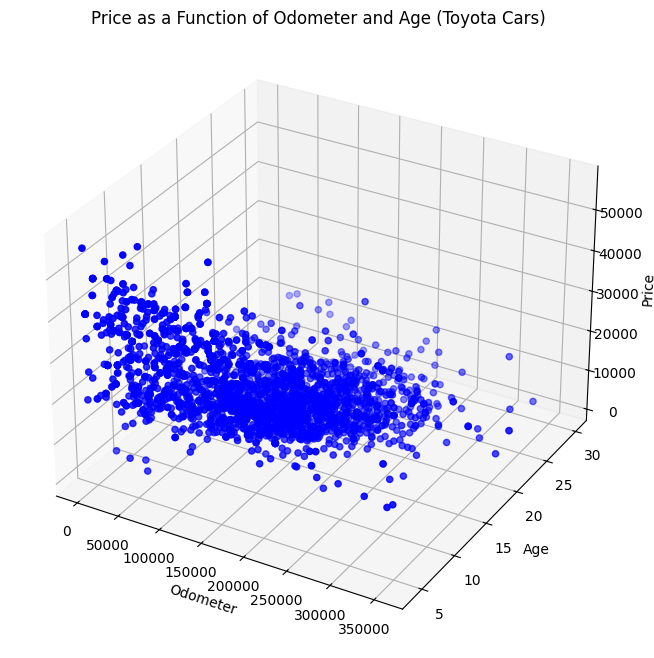

In [ ]:
# prompt: create a second order parabolic model for price and odometer for toyota_cars.
# find the optimal fit.

# Assuming your DataFrame is named 'toyota_cars'
X = toyota_cars[['odometer', 'age']]  # Features: odometer and age
y = toyota_cars['price']  # Target: price

# Create polynomial features up to degree 2
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Print the coefficients and intercept
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")


# Create a 3D scatter plot for visualization
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(toyota_cars['odometer'], toyota_cars['age'], toyota_cars['price'], c='blue', marker='o')
ax.set_xlabel('Odometer')
ax.set_ylabel('Age')
ax.set_zlabel('Price')
ax.set_title('Price as a Function of Odometer and Age (Toyota Cars)')
plt.show()

# You can further analyze the coefficients to understand the impact of each feature and interaction term on the price.

Mean Squared Error: 72244206.51263452
Coefficients: [-2.11562053e-01  4.44437030e-07]
Intercept: 32243.85569641491


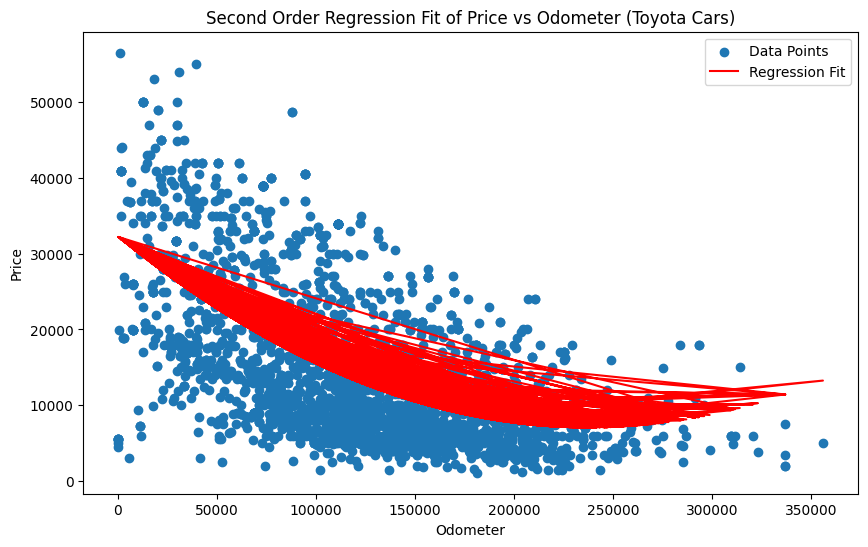

In [ ]:
# prompt: create a second order regression fit to the price and odometer relations in the toyota_cars dataset.  Limit fit to second order.

# Assuming your DataFrame is named 'toyota_cars'
X = toyota_cars['odometer'].values.reshape(-1, 1)
y = toyota_cars['price'].values

# Create polynomial features up to degree 2
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Print the coefficients and intercept
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")


# Plot the regression fit
plt.figure(figsize=(10, 6))
plt.scatter(toyota_cars['odometer'], toyota_cars['price'], label='Data Points')
plt.plot(toyota_cars['odometer'], model.predict(poly_features.fit_transform(toyota_cars['odometer'].values.reshape(-1, 1))), color='red', label='Regression Fit')
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.title('Second Order Regression Fit of Price vs Odometer (Toyota Cars)')
plt.legend()
plt.show()

In [ ]:
from sklearn import linear_model
features = toyota_cars[['odometer']]
f=linear_model.LinearRegression(fit_intercept = False)
f.fit(features, toyota_cars['price'])
f.coef_

array([0.07672433])

In [ ]:
# prompt: add a new column to toyota_cars.  Name the column odo2.  The column content is squared of odometer.

toyota_cars['odo2'] = toyota_cars['odometer'] ** 2

In [ ]:
toyota_cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2603 entries, 215 to 426782
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2603 non-null   int64  
 1   region            2603 non-null   object 
 2   price             2603 non-null   int64  
 3   manufacturer      2603 non-null   object 
 4   model             2603 non-null   object 
 5   condition         2603 non-null   object 
 6   cylinders         2603 non-null   object 
 7   fuel              2603 non-null   object 
 8   odometer          2603 non-null   float64
 9   title_status      2603 non-null   object 
 10  transmission      2603 non-null   object 
 11  VIN               2603 non-null   object 
 12  type              2603 non-null   object 
 13  paint_color       2603 non-null   object 
 14  state             2603 non-null   object 
 15  age               2603 non-null   float64
 16  size_compact      2603 non-null   int64  
 

In [ ]:
features = toyota_cars[['odometer', 'odo2']]
f=linear_model.LinearRegression(fit_intercept = True)
f.fit(features, toyota_cars['price'])
f.coef_
toyota_cars['predict']=f.predict(features)

In [ ]:
f.coef_

array([-2.03649755e-01,  4.18905439e-07])

In [ ]:
f.intercept_

31689.440258329345

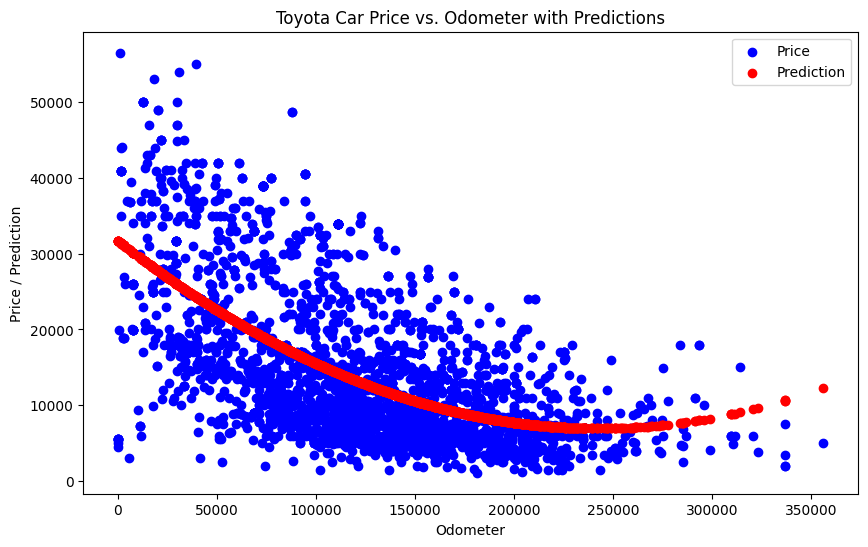

In [ ]:
# prompt: plot price and predict of toyota_cars vs. odometer using different color codes

plt.figure(figsize=(10, 6))
plt.scatter(toyota_cars['odometer'], toyota_cars['price'], color='blue', label='Price')
plt.scatter(toyota_cars['odometer'], toyota_cars['predict'], color='red', label='Prediction')
plt.xlabel('Odometer')
plt.ylabel('Price / Prediction')
plt.title('Toyota Car Price vs. Odometer with Predictions')
plt.legend()
plt.show()

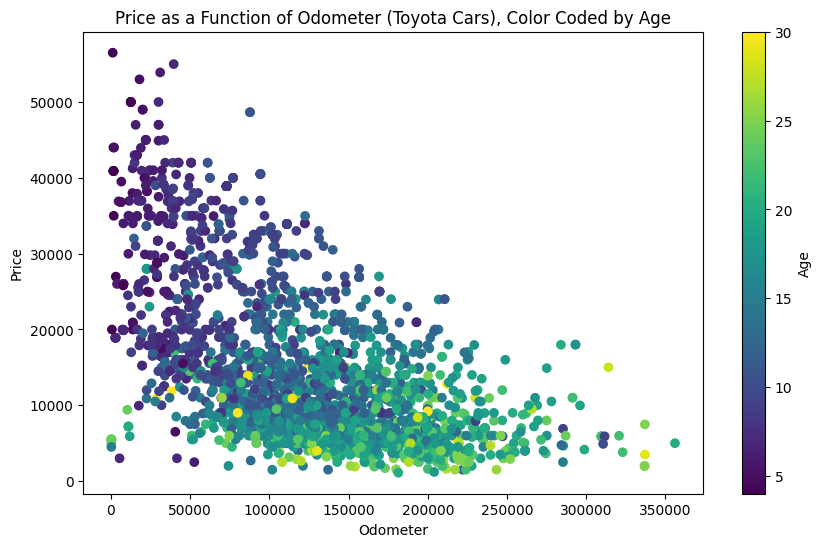

In [ ]:
# prompt: for toyota_cars data frame, plot price as a function of odometer. color code by age.

# Assuming your DataFrame is named 'toyota_cars'
plt.figure(figsize=(10, 6))
scatter = plt.scatter(toyota_cars['odometer'], toyota_cars['price'], c=toyota_cars['age'])
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.title('Price as a Function of Odometer (Toyota Cars), Color Coded by Age')
plt.colorbar(scatter, label='Age')
plt.show()

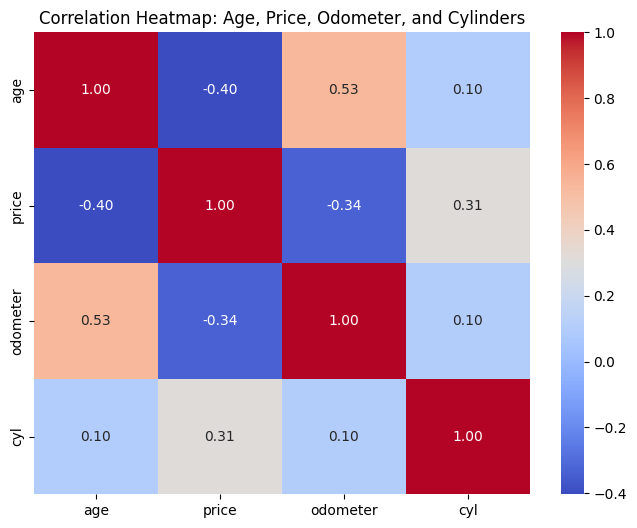

In [ ]:
# prompt: generate a heatmap of correlation between age, price, odometer, and cyl

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'car1' and it contains the columns 'age', 'price', 'odometer', and 'cyl'
correlation_data = car1[['age', 'price', 'odometer', 'cyl']]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Age, Price, Odometer, and Cylinders')
plt.show()

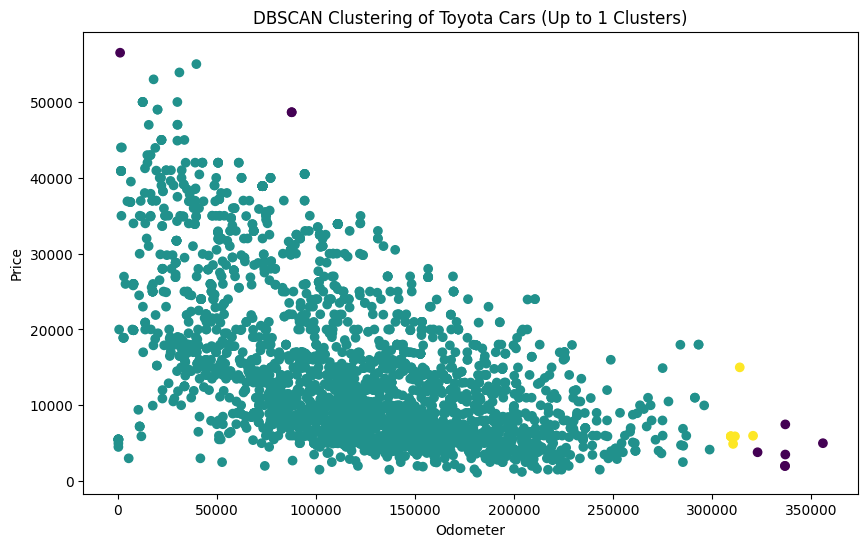

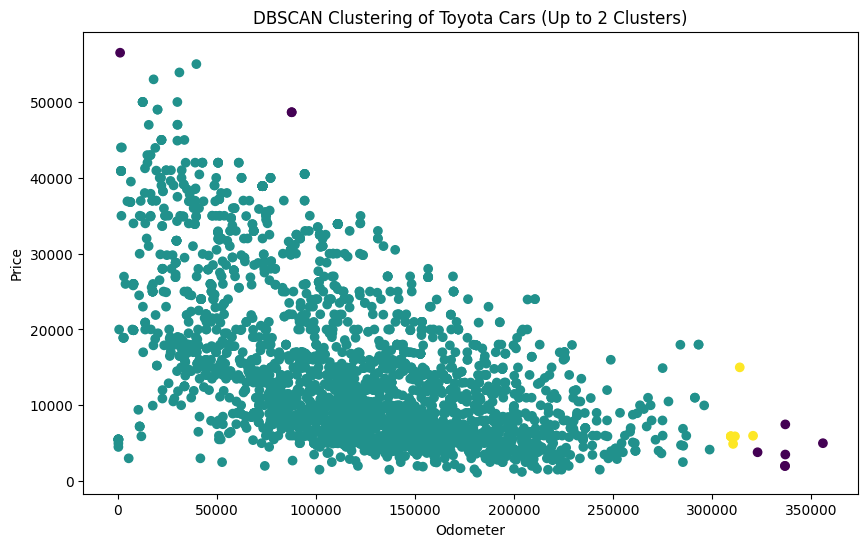

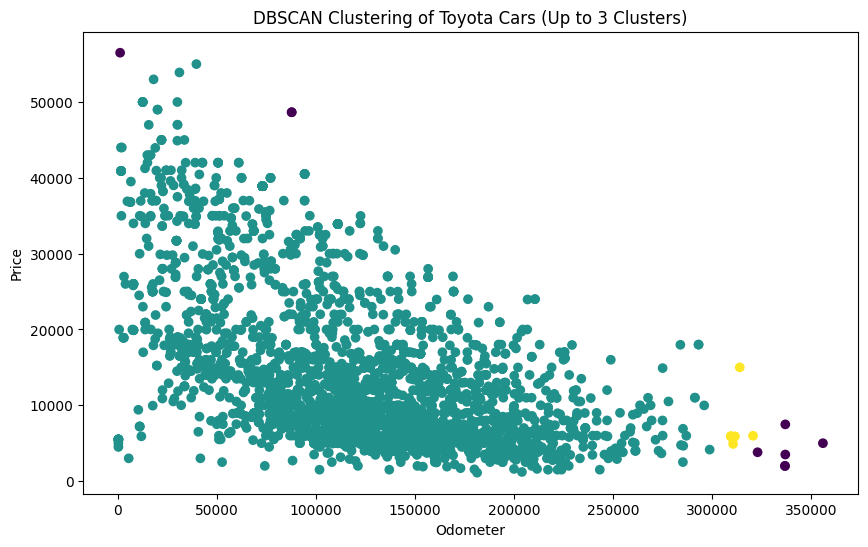

In [ ]:
# prompt: For toyota_cars, use up to three DBSCAN clusters to fit the price and odometer space

from sklearn.cluster import DBSCAN

# Assuming your DataFrame is named 'toyota_cars'
X = toyota_cars[['price', 'odometer']]

# Iterate through different numbers of clusters
for n_clusters in range(1, 4):
  # Create a DBSCAN model
  dbscan = DBSCAN(eps=10000, min_samples=5)  # Adjust eps and min_samples as needed

  # Fit the model to the data
  clusters = dbscan.fit_predict(X)

  # Add the cluster labels to the DataFrame
  toyota_cars['cluster'] = clusters

  # Visualize the clusters
  plt.figure(figsize=(10, 6))
  plt.scatter(toyota_cars['odometer'], toyota_cars['price'], c=toyota_cars['cluster'])
  plt.xlabel('Odometer')
  plt.ylabel('Price')
  plt.title(f'DBSCAN Clustering of Toyota Cars (Up to {n_clusters} Clusters)')
  plt.show()

  # You can further analyze the clusters here, for example, by looking at their characteristics.
  # For instance, calculate the mean price and odometer for each cluster.
  # ...



### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

Overall the data containing all cars, all models, all years are quite difficult to regression fit with high accuracy.  However, statistical analysis shows basic trends.
If my friend is running a used car dealer and I am to give him some information, I would tell him this:
1. Try to sell Toyota, Ford and Chevy that are within 10 years.
2. Don't sell Tesla yet since the data is rare.  However, it might be an opportunity.

I used one-hot encoding for following data fit.
1. Linear regression model to predict car price based on cylinders, drive, and age.
2. This can be extended to any combination of fits of age, odometer, cylinder, drive. size.

For toyota cars alone, I used parabolic model to fit the odometer vs. price curve.

In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 402825 entries, 27 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            402825 non-null  int64  
 1   region        402825 non-null  object 
 2   price         402825 non-null  int64  
 3   manufacturer  389916 non-null  object 
 4   model         399022 non-null  object 
 5   condition     238197 non-null  object 
 6   cylinders     234173 non-null  object 
 7   fuel          400680 non-null  object 
 8   odometer      402825 non-null  float64
 9   title_status  395554 non-null  object 
 10  transmission  401171 non-null  object 
 11  VIN           258455 non-null  object 
 12  drive         280705 non-null  object 
 13  size          112099 non-null  object 
 14  type          318401 non-null  object 
 15  paint_color   281505 non-null  object 
 16  state         402825 non-null  object 
 17  age           402825 non-null  float64
dtypes: float

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

# The report is in the form of word file.
A list of business suggestions to the car dealer:
1.	Stock on 3 best volume cars – Ford, Chevy, and Toyota.
2.	Used car price drops monotonically over age – except for exotic cars.
3.	Second hand cars of four years command a higher price than “younger” used cars.
4.	Tesla cars have good price but the history of retail is not proven.
5.	Toyota is a better second hand car to have in inventory than Honda, Hyundai, and Volvo.  It has longer retail cycle and higher price.
